In [299]:
import urllib2
import ast 
import matplotlib
import matplotlib.pyplot as plt
import time
from datetime import datetime
import pickle
%matplotlib inline

In [217]:
def name(name):
    if 'uberX' == name:
        return 'uberx'
    elif 'SUV' in name:
        return 'suv'
    elif 'UberBlack' in name:
        return 'black'
    elif 'Sedan' == name:
        return 'sedan'
    else: 
        return name

In [218]:
class Uber(object):
    def __init__(self, list):            
        self.uberx_high = [d['uberx']['high'] for d in list]
        self.uberx_low = [d['uberx']['low'] for d in list]
        self.uberx_surge = [d['uberx']['surge'] for d in list]
        self.suv_high = [d['suv']['high'] for d in list]
        self.suv_low = [d['suv']['low'] for d in list]
        self.suv_surge = [d['suv']['surge'] for d in list]
        self.black_high = [d['black']['high'] for d in list]
        self.black_low = [d['black']['low'] for d in list]
        self.black_surge = [d['black']['surge'] for d in list]
        self.sedan_high = [d['sedan']['high'] for d in list]
        self.sedan_low = [d['sedan']['low'] for d in list]
        self.sedan_surge = [d['sedan']['surge'] for d in list]
    

In [237]:
def uber_web(url):
    webpage = urllib2.urlopen(url)
    data_json = webpage.read()
    data = ast.literal_eval(data_json)
    instance=data.values()[0]
    return dict([[name(key['display_name']),{'high':key['high_estimate'],'low':key['low_estimate'],\
                                             'dist':key['distance'],'surge':key['surge_multiplier'],\
                                             'time':datetime.now()}] for key in instance])

In [240]:
###  location latitude and longitude
sanamlung=[13.75509, 100.49303]
paragon=[13.74448, 100.53309] 
kasert=[13.84559, 100.56525]
seacon=[13.69424, 100.64782]

In [ ]:
url = 'https://api.uber.com/v1/estimates/price?start_latitude=%s&start_longitude=%s'\
+'&end_latitude=%s&end_longitude=%s&server_token=0xqzfosImWHnzD9MZzcR3x-EMA-n1lLxWORCTuLv'
url_1=url % (str(sanamlung[0]), str(sanamlung[1]), str(paragon[0]), str(paragon[1]))
url_2=url % (str(sanamlung[0]), str(sanamlung[1]), str(kasert[0]), str(kasert[1]))
url_3=url % (str(sanamlung[0]), str(sanamlung[1]), str(seacon[0]), str(seacon[1]))

l1=[]
l2=[]
l3=[]

In [303]:
#only run this one - l1, l2, l3 is continously collected
numtime=3
for i in range(numtime):
    if i>0 and i<numtime-1:
        print 'sleep for 5 mins'
        time.sleep(300)
    u1=uber_web(url_1)
    u2=uber_web(url_2)
    u3=uber_web(url_3)
    l1.append(u1)
    l2.append(u2)
    l3.append(u3)
    print 'done:'+str(i)
    

done:0
sleep for 5 mins
done:1
done:2


In [290]:
[x['uberx']['time'] for x in l1]

[datetime.datetime(2016, 1, 29, 21, 25, 36, 703924),
 datetime.datetime(2016, 1, 29, 21, 30, 39, 806937),
 datetime.datetime(2016, 1, 29, 21, 35, 42, 625683),
 datetime.datetime(2016, 1, 30, 0, 46, 34, 379438),
 datetime.datetime(2016, 1, 30, 1, 24, 38, 528425),
 datetime.datetime(2016, 1, 30, 1, 29, 41, 61844),
 datetime.datetime(2016, 1, 30, 1, 34, 44, 118494),
 datetime.datetime(2016, 1, 30, 1, 34, 46, 730163),
 datetime.datetime(2016, 1, 30, 1, 47, 24, 606610),
 datetime.datetime(2016, 1, 30, 1, 47, 27, 322061),
 datetime.datetime(2016, 1, 30, 1, 47, 47, 271773),
 datetime.datetime(2016, 1, 30, 1, 47, 49, 770698),
 datetime.datetime(2016, 1, 30, 1, 49, 31, 362962),
 datetime.datetime(2016, 1, 30, 1, 54, 34, 304069),
 datetime.datetime(2016, 1, 30, 1, 54, 36, 810162),
 datetime.datetime(2016, 1, 30, 2, 20, 57, 319665),
 datetime.datetime(2016, 1, 30, 2, 26, 0, 636109),
 datetime.datetime(2016, 1, 30, 2, 26, 3, 318461),
 datetime.datetime(2016, 1, 30, 10, 4, 33, 180407),
 datetime.da

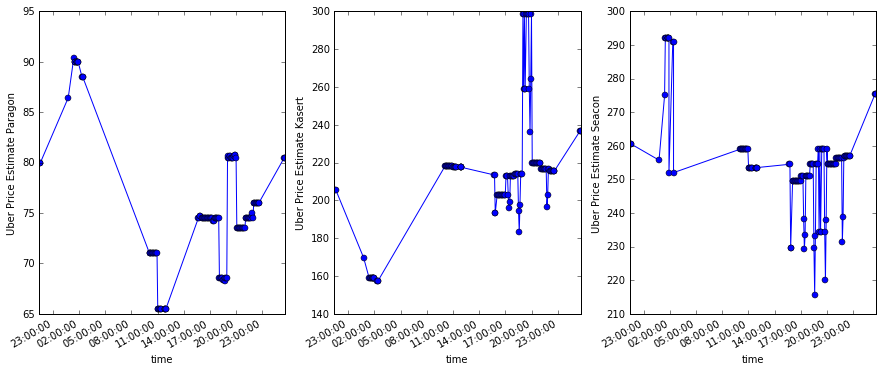

In [304]:
import numpy as np

lu1=Uber(l1)
lu2=Uber(l2)
lu3=Uber(l3)

#dates = matplotlib.dates.date2num([x['uberx']['time'] for x in l1])
fig, ax = plt.subplots(1, 3, figsize=(15,6))
fig.autofmt_xdate()

ax[0].plot([x['uberx']['time'] for x in l1], (np.array(lu1.uberx_high)+np.array(lu1.uberx_low))/2./np.array(lu1.uberx_surge), marker='o')
#ax[0].plot([x['black']['time'] for x in l1], [x['black']['high'] for x in l1], marker='o')
ax[0].set_xlabel('time')
ax[0].set_ylabel('Uber Price Estimate Paragon')

ax[1].plot([x['uberx']['time'] for x in l2], (np.array(lu2.uberx_high)+np.array(lu2.uberx_low))/2./np.array(lu2.uberx_surge), marker='o')
#ax[1].plot([x['black']['time'] for x in l2], [x['black']['high'] for x in l2], marker='o')
ax[1].set_xlabel('time')
ax[1].set_ylabel('Uber Price Estimate Kasert')

ax[2].plot([x['uberx']['time'] for x in l3], (np.array(lu3.uberx_high)+np.array(lu3.uberx_low))/2./np.array(lu3.uberx_surge), marker='o')
#ax[2].plot([x['black']['time'] for x in l3], [x['black']['high'] for x in l3], marker='o')
ax[2].set_xlabel('time')
ax[2].set_ylabel('Uber Price Estimate Seacon')

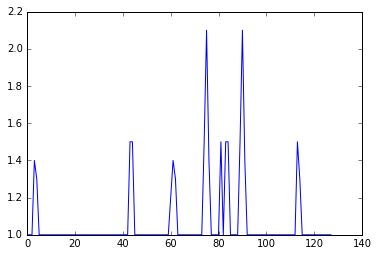

In [305]:
plt.plot(lu1.uberx_surge)

In [306]:
#save all interested variables into pickle
with open('uber.pickle', 'wb') as f:
    pickle.dump([lu1, lu2, lu3], f)

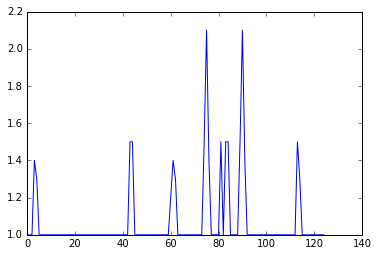

In [302]:
with open('uber.pickle') as f:
    a1, a2, a3 = pickle.load(f)
    
plt.plot(a1.uberx_surge)

In [95]:
instance

[{'currency_code': 'THB',
  'display_name': 'uberX',
  'distance': 3.53,
  'duration': 780,
  'estimate': '\\u0e3f59-71',
  'high_estimate': 71,
  'localized_display_name': 'uberX',
  'low_estimate': 59,
  'minimum': 25,
  'product_id': '2541f77c-920a-45c4-8bf3-603ecd625195',
  'surge_multiplier': 1.0},
 {'currency_code': 'THB',
  'display_name': 'Nearest UberBlack',
  'distance': 3.53,
  'duration': 780,
  'estimate': '\\u0e3f150-184',
  'high_estimate': 184,
  'localized_display_name': 'Nearest UberBlack',
  'low_estimate': 150,
  'minimum': 50,
  'product_id': '179935d5-d763-461e-8818-1367cb9b61f2',
  'surge_multiplier': 1.0},
 {'currency_code': 'THB',
  'display_name': 'Sedan',
  'distance': 3.53,
  'duration': 780,
  'estimate': '\\u0e3f150-184',
  'high_estimate': 184,
  'localized_display_name': 'Sedan',
  'low_estimate': 150,
  'minimum': 50,
  'product_id': 'e7dda7a6-6d45-4025-94b2-07739243c7a8',
  'surge_multiplier': 1.0},
 {'currency_code': 'THB',
  'display_name': 'SUV\\/MP

In [100]:
list=[[x['display_name'], x['high_estimate'], x['low_estimate'], x['distance'], x['surge_multiplier']] for x in instance] 

In [106]:
list

[['uberX', 71, 59, 3.53, 1.0],
 ['Nearest UberBlack', 184, 150, 3.53, 1.0],
 ['Sedan', 184, 150, 3.53, 1.0],
 ['SUV\\/MPV', 184, 150, 3.53, 1.0]]

In [104]:
list[0][0]

'uberX'

In [120]:
[[y,instance['display_name'][0]] for y in [x['display_name'] for x in instance]]

TypeError: list indices must be integers, not str

In [174]:

    
uber=dict([[name(key['display_name']), {'high':key['high_estimate'],'low':key['low_estimate'],'dist':key['distance'],\
                        'surge':key['surge_multiplier'],'time':str(datetime.now())}] for key in instance])

uber2=dict([[name(key['display_name']), {'high':100,'low':0,'dist':key['distance'],\
                        'surge':key['surge_multiplier'],'time':str(datetime.now())}] for key in instance])

l=[uber,uber2] 

[d['uberx']['high'] for d in l]

[71, 100]

In [175]:
l

[{'black': {'dist': 3.53,
   'high': 184,
   'low': 150,
   'surge': 1.0,
   'time': '2016-01-29 15:37:29.750406'},
  'sedan': {'dist': 3.53,
   'high': 184,
   'low': 150,
   'surge': 1.0,
   'time': '2016-01-29 15:37:29.750411'},
  'suv': {'dist': 3.53,
   'high': 184,
   'low': 150,
   'surge': 1.0,
   'time': '2016-01-29 15:37:29.750415'},
  'uberx': {'dist': 3.53,
   'high': 71,
   'low': 59,
   'surge': 1.0,
   'time': '2016-01-29 15:37:29.750393'}},
 {'black': {'dist': 3.53,
   'high': 100,
   'low': 0,
   'surge': 1.0,
   'time': '2016-01-29 15:37:29.750536'},
  'sedan': {'dist': 3.53,
   'high': 100,
   'low': 0,
   'surge': 1.0,
   'time': '2016-01-29 15:37:29.750539'},
  'suv': {'dist': 3.53,
   'high': 100,
   'low': 0,
   'surge': 1.0,
   'time': '2016-01-29 15:37:29.750542'},
  'uberx': {'dist': 3.53,
   'high': 100,
   'low': 0,
   'surge': 1.0,
   'time': '2016-01-29 15:37:29.750530'}}]